<a href="https://colab.research.google.com/github/bigdog3626/SensorFailurePrediction/blob/main/SensorFailurePredictionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sensor Failure Detection/Prediction
Pattern recognition final project
Dylan Meyer

The Dataset: https://www.kaggle.com/datasets/nphantawee/pump-sensor-data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Initalizations and dataframe creation

In [ ]:
%pip install scikit-learn-intelex
%pip install tune-sklearn ray[tune]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 4.7 MB/s 
     |████████████████████████████████| 26.1 MB 1.3 MB/s 
     |████████████████████████████████| 300.3 MB 18 kB/s 
     |████████████████████████████████| 4.0 MB 52.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 116 kB/s 
     |████████████████████████████████| 58.9 MB 47 kB/s 
     |████████████████████████████████| 8.8 MB 53.7 MB/s 
     |████████████████████████████████| 125 kB 71.0 MB/s 
     |████████████████████████████████| 468 kB 74.9 MB/s 


In [ ]:
# Initialize imports
import numpy as np
import pandas as pd
import seaborn as sn
# Sklearnex for better performance
from sklearnex import patch_sklearn
patch_sklearn()
from tune_sklearn import TuneGridSearchCV

# Sklearn general imports
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.preprocessing import LabelEncoder
# Pipeline output as displays
set_config(display='diagram')

# Plotting Library
import matplotlib.pyplot as plt
%matplotlib inline

# Missing Data Visualization library
import missingno as mso

import joblib

# Set path to data
data = '/content/drive/MyDrive/PatternRec_Project/sensor.csv'

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
# Create Dataframe from our sensor data

df = pd.read_csv(data)
df

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,220320.0,110159.500000,63601.049991,0.000000,55079.750000,110159.500000,165239.250000,220319.000000
sensor_00,210112.0,2.372221,0.412227,0.000000,2.438831,2.456539,2.499826,2.549016
sensor_01,219951.0,47.591611,3.296666,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,220301.0,50.867392,3.666820,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,220301.0,43.752481,2.418887,31.640620,42.838539,44.227428,45.312500,48.220490
sensor_04,220301.0,590.673936,144.023912,2.798032,626.620400,632.638916,637.615723,800.000000
sensor_05,220301.0,73.396414,17.298247,0.000000,69.976260,75.576790,80.912150,99.999880
sensor_06,215522.0,13.501537,2.163736,0.014468,13.346350,13.642940,14.539930,22.251160
sensor_07,214869.0,15.843152,2.201155,0.000000,15.907120,16.167530,16.427950,23.596640
sensor_08,215213.0,15.200721,2.037390,0.028935,15.183740,15.494790,15.697340,24.348960


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [ ]:
df.isnull().sum(axis=0)

Unnamed: 0             0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16


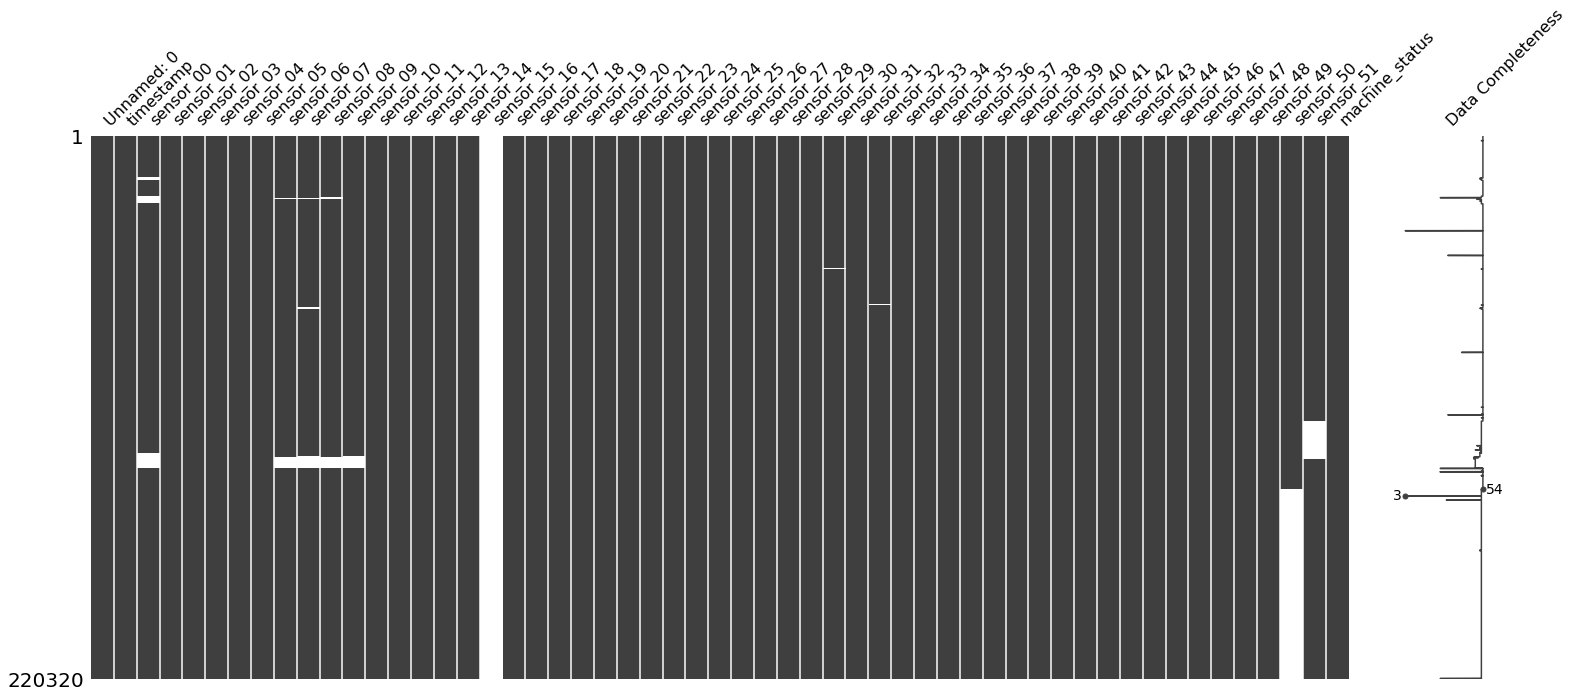

In [ ]:
# Visualize some of those null areas in the data
mso.matrix(df, labels=list(df.columns))

As we saw in our null sum dumps we have a few features with completely empty data, or too much unusable data we will remove those

In [ ]:
# Remove cols wit 5k+
df.drop(['Unnamed: 0', 'sensor_00', 'sensor_15', 'sensor_50', 'sensor_51'], axis=1, inplace=True)

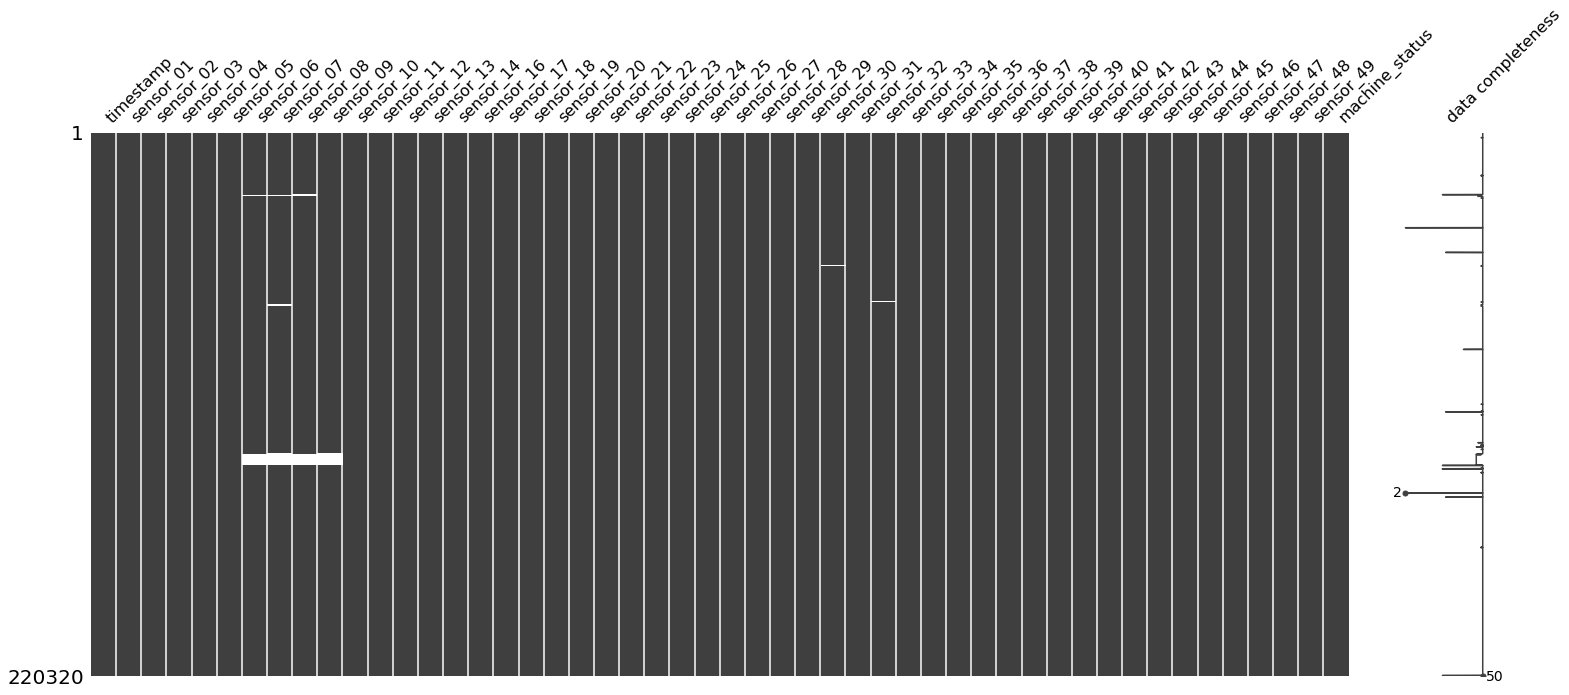

In [ ]:
mso.matrix(df, labels=list(df.columns))

### Data Exploration

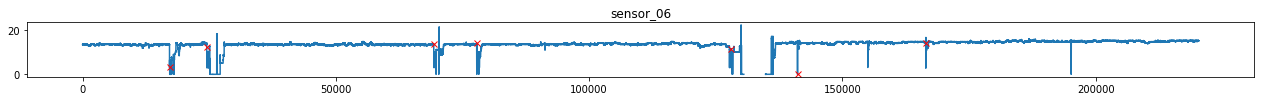

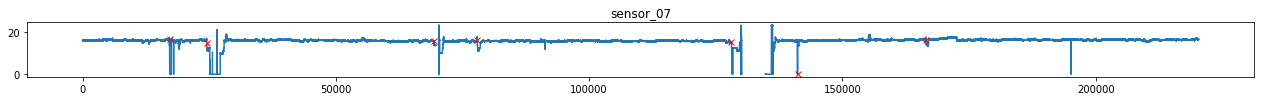

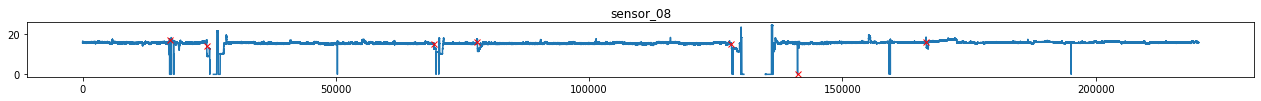

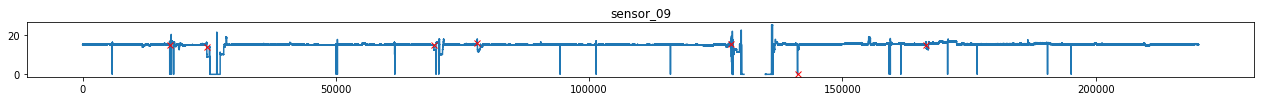

In [ ]:
sens_list = ['sensor_06','sensor_07','sensor_08','sensor_09']
broken_rows = df[df['machine_status']=='BROKEN']
for i in sens_list:
  plot = plt.figure(figsize=(22,1))
  plot = plt.plot(df[i])
  plot = plt.plot(broken_rows[i], marker='x', color='red', linestyle='none')
  plot = plt.title(i)
  


This missing chunks in these sensors are related, yet not attatched to any system breaks

Focus on Machine status as that is what we would like our model to detect and classify

In [ ]:
df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

Machine Status windows

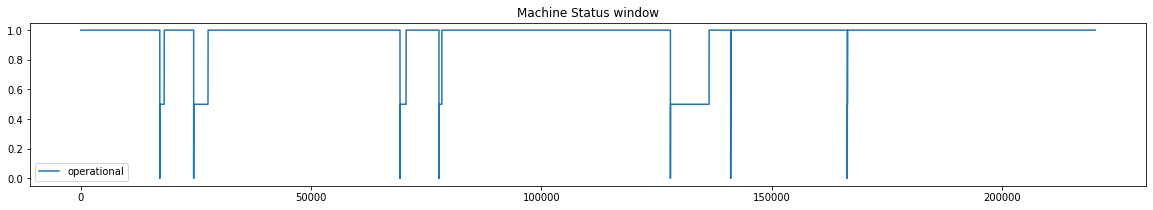

In [ ]:
# create operational graph
conditions = [(df['machine_status'] == 'NORMAL'), (df['machine_status'] == 'RECOVERING'), (df['machine_status'] == 'BROKEN')]
choices = [1,0.5,0]
op_df = df.copy()
op_df['operational']  = np.select(condlist=conditions, choicelist=choices)
ax = op_df['operational'].plot(title='Machine Status window', legend=True, figsize=(20,3), )

<ipython-input-14-4ef9e484711c>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plot = plt.figure(figsize=(22,1))


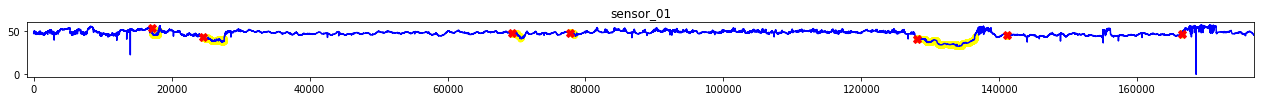

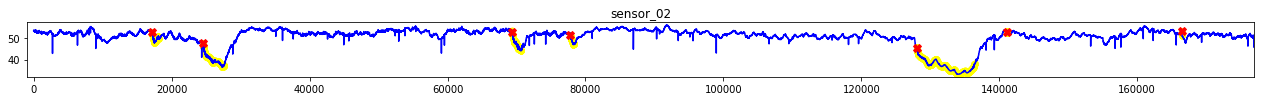

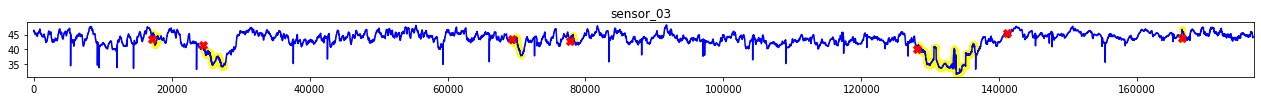

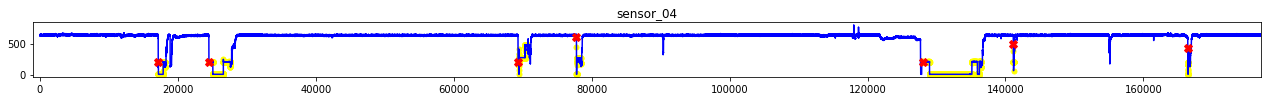

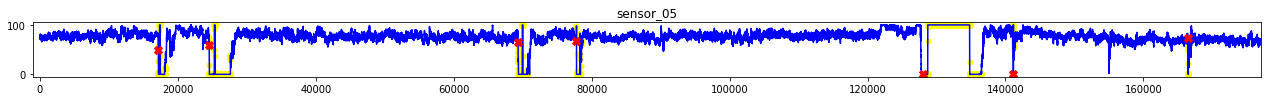

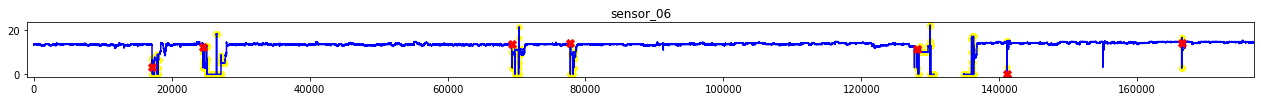

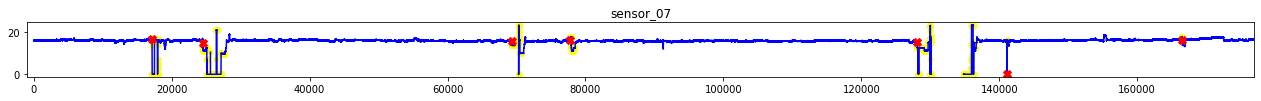

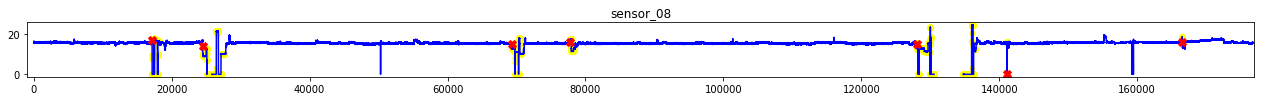

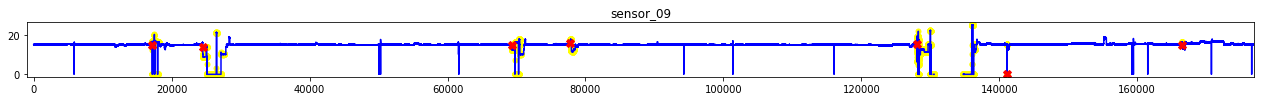

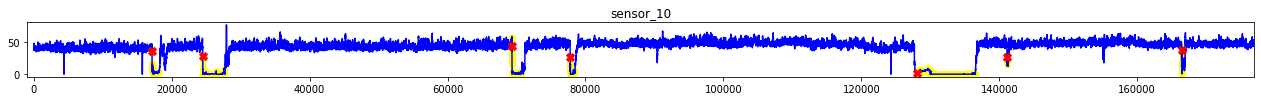

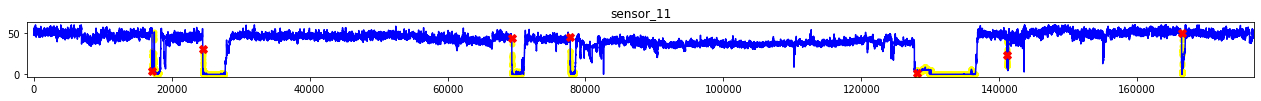

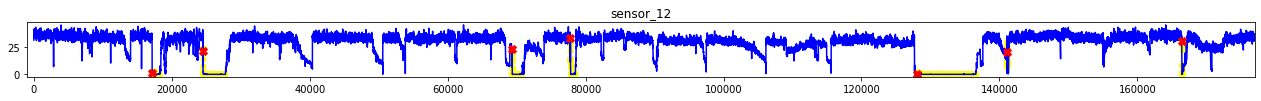

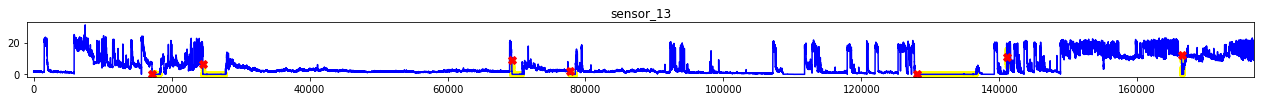

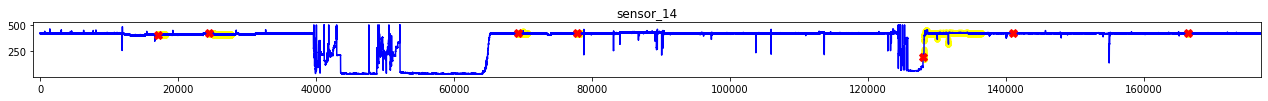

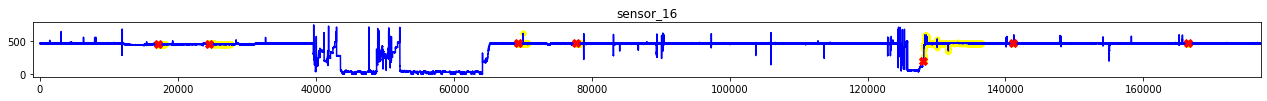

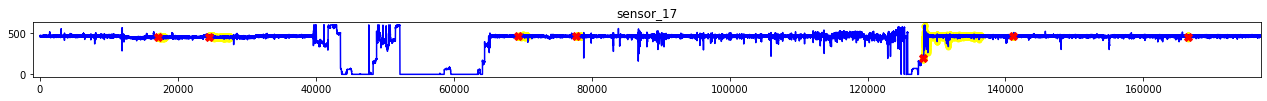

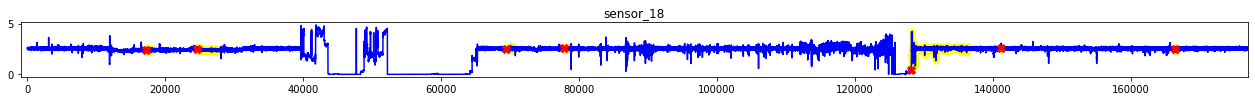

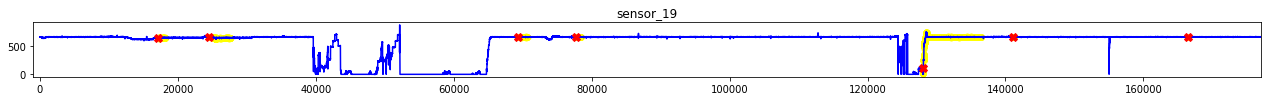

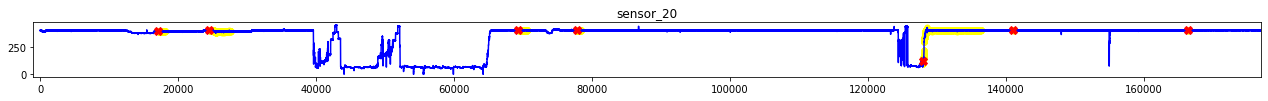

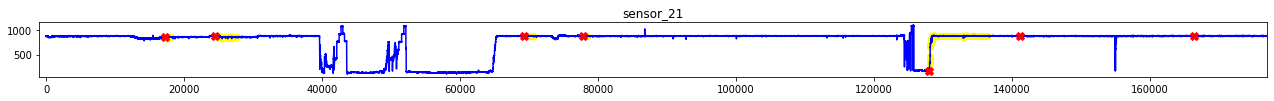

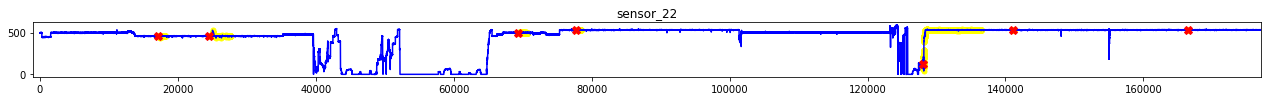

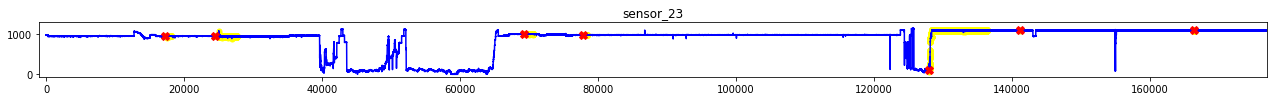

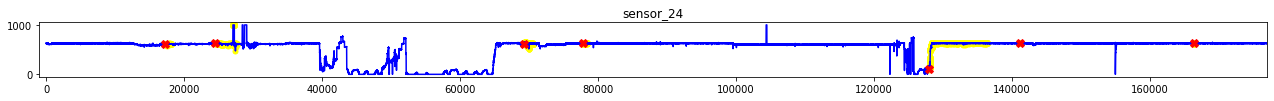

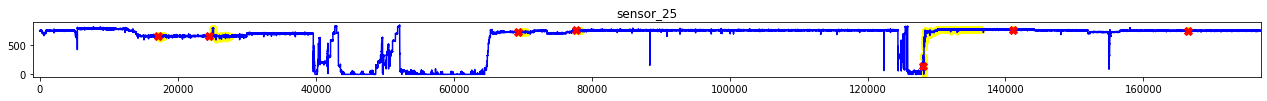

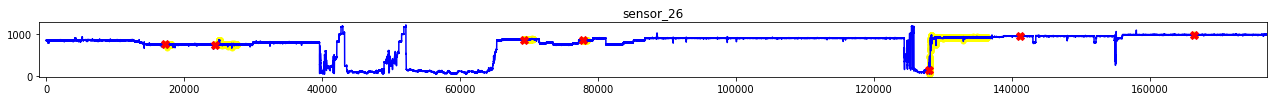

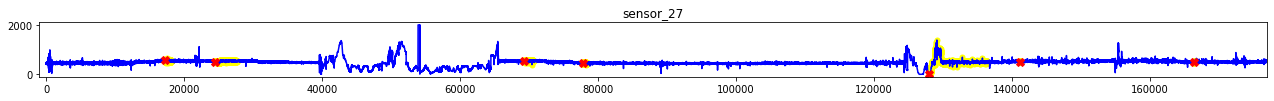

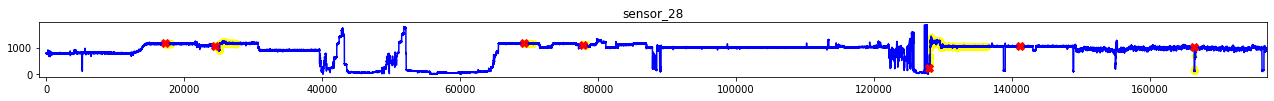

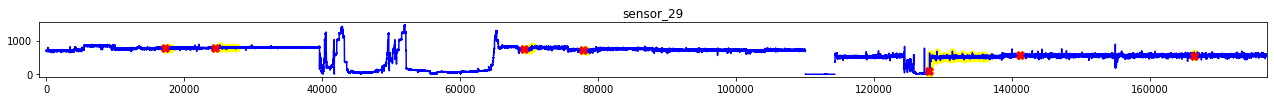

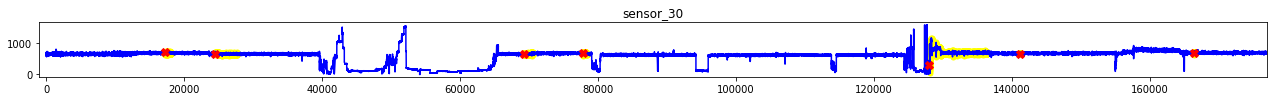

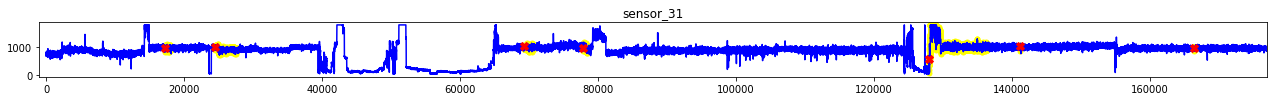

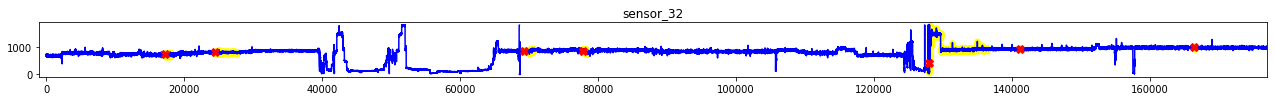

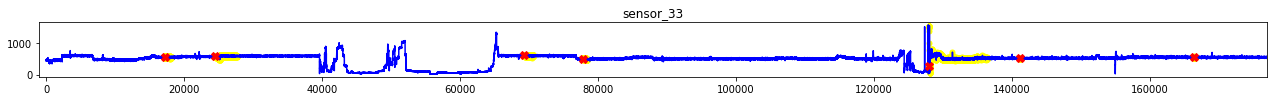

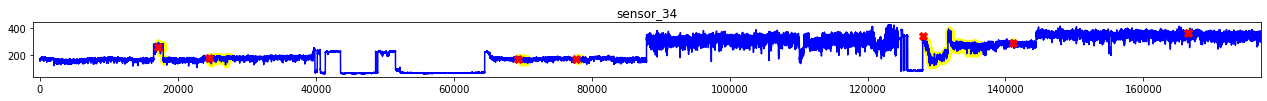

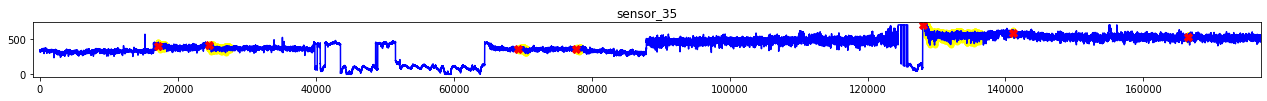

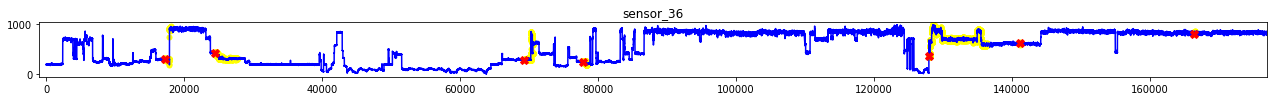

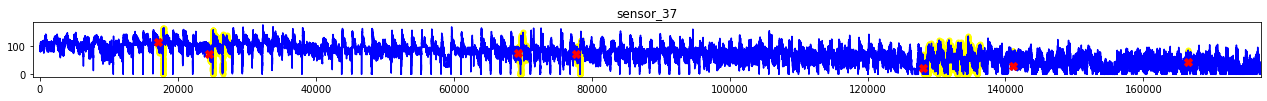

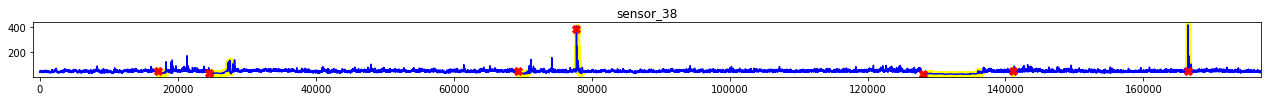

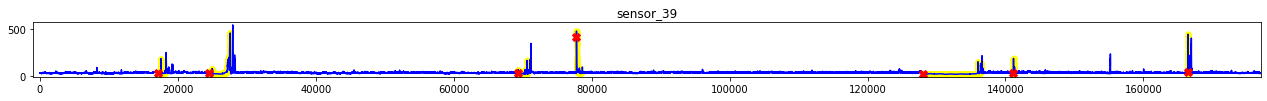

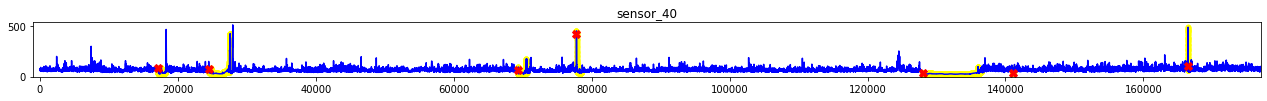

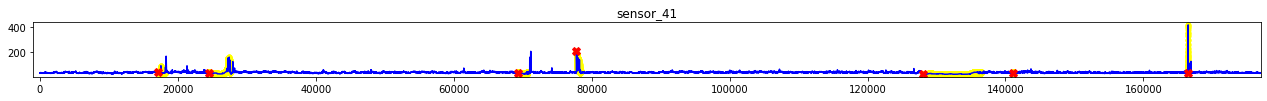

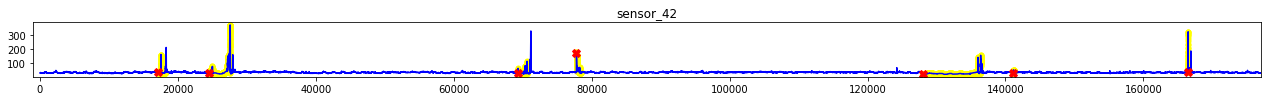

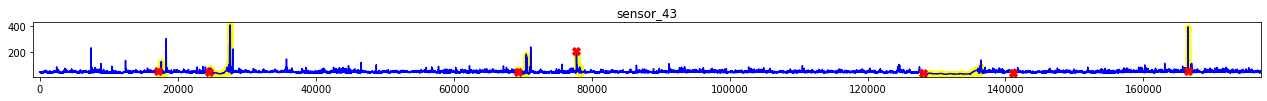

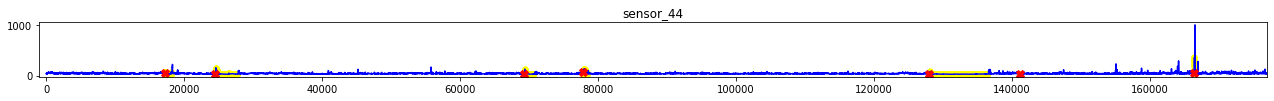

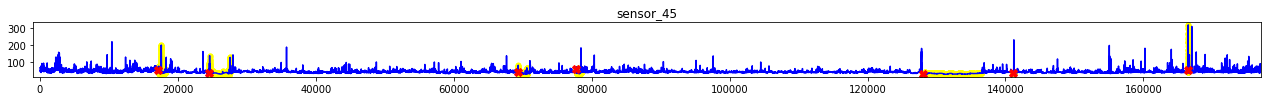

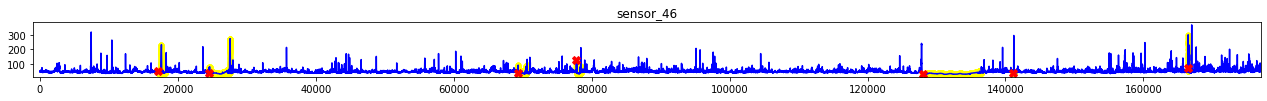

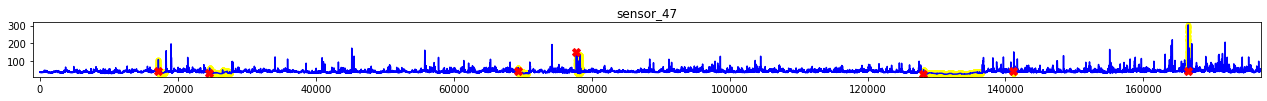

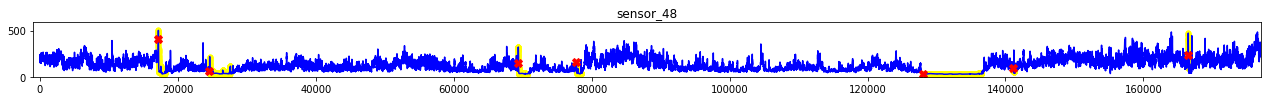

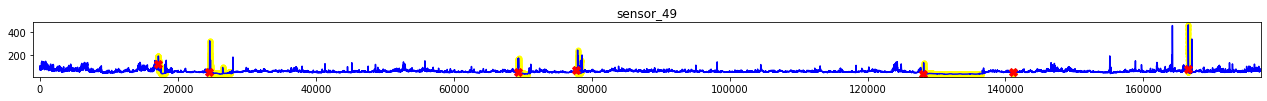

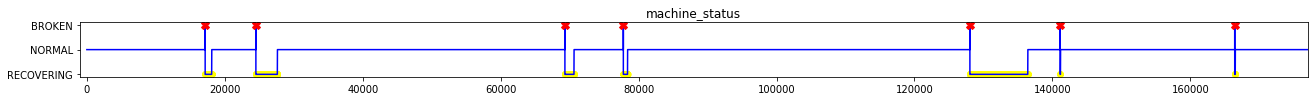

In [ ]:
sensor_cols = df.iloc[:,1:]
broken_rows = df[df['machine_status']=='BROKEN']
recovery_rows = df[df['machine_status']=='RECOVERING']
normal_rows = df[df['machine_status']=='NORMAL']
machine_status_col = df['machine_status']
for sensor in sensor_cols:
    plot = plt.figure(figsize=(22,1))
    plot = plt.plot(recovery_rows[sensor], linestyle = 'none', marker='o', color='yellow', markersize=5)
    plot = plt.plot(df[sensor], color='blue')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red',markersize=8)
    plot = plt.title(sensor)
    plt.xlim((-1000, 177000))

## Begin data preprocessing & Model Selection
Using pipelines to impute and standard scale run a gridsearchCV to determine best hyper parameters for multiple models

In [ ]:
# Create Train test split at 40% so 5 System breaks in train and 2 on test
last_40percent = round(len(df) - len(df) * .4)
df_train = df.iloc[:last_40percent, :]
df_test = df.iloc[last_40percent:, :]

In [ ]:
# Verify two break instances in test set
df_test[df_test['machine_status']=='BROKEN']

,timestamp,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status
141131,2018-07-08 00:11:00,45.138890,52.90799,45.35590,500.000000,1.40131,0.028935,0.036169,0.036169,0.007234,...,35.41666,32.81250,36.19791,37.32639,35.30093,38.19444,43.40278,99.53703,44.84954,BROKEN
166440,2018-07-25 14:00:00,45.833332,52.99479,43.88021,420.503448,72.52040,14.185470,16.247110,15.697340,15.053530,...,35.41666,36.45833,51.30208,52.10200,52.66204,67.12963,43.98148,230.32410,69.73380,BROKEN


In [ ]:
# Create X and y dataframes
X, y = df.iloc[:, 1:-1], df.iloc[:, -1]
X_features = list(X.columns)

In [ ]:
# Make X_train, X_test, y_train, y_test
X_train = df_train.iloc[:, 1:-1].copy()
y_train = df_train['machine_status']
X_test = df_test.iloc[:, 1:-1].copy()
y_test = df_test['machine_status']

### Preprocessing Pipeline

In [ ]:
# Set up pipeline
numeric_features = X_features
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
preprocessor = ColumnTransformer(transformers=[
    ("num_transform", numeric_transformer, numeric_features),

])

## Modeling with Stochastic Gradient Descent

In [ ]:
# Initalize Estimators
pca = PCA(svd_solver='full', random_state=42)
sdg = SGDClassifier(tol=0.1)

# Construct pipeline
SGD_pipeline = Pipeline(steps=[("preprocesser", preprocessor), ('pca', pca), ("classifier", sdg)])
SGD_pipeline

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(transformers=[('num_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sensor_01', 'sensor_02',
                                                   'sensor_03', 'sensor_04',
                                                   'sensor_05', 'sensor_06',
                                                   'sensor_07', 'sensor_08',
                                                   'sensor_09', 'sensor_10',
                                                   'sensor_11', 'sensor_12',
                                                   'sensor_13', 'sensor_14',
                                                   'sensor_16', 'sensor_17',
                                                   'sensor_18', 'sensor_19',
                                                   'sensor_20', 'sensor_21',
                                                   'sensor_22', 'sensor_23',
                                                   'sensor_24', 'sensor_25',
                                                   'sensor_26', 'sensor_27',
                                                   'sensor_28', 'sensor_29',
                                                   'sensor_30', 'sensor_31', ...])])),
                ('pca', PCA(random_state=42, svd_solver='full')),
                ('classifier', SGDClassifier(tol=0.1))])

Gridsearch to find best possible paramaters scenario in which to train our model on

In [ ]:
%%script echo skipping
param_grid = {
    "pca__n_components": [5, 10, 15, 20, 25, 30],"classifier__loss": ["squared_hinge"],
    "classifier__alpha":[0.0001, 0.001],
    "classifier__penalty":["l2"],
    "classifier__learning_rate":['optimal'],
    "classifier__max_iter":[1000, 5000, 10000]
}


search = TuneGridSearchCV(SGD_pipeline, param_grid=param_grid, n_jobs=4, early_stopping=True, max_iters=10)
search.fit(X, y)


skipping


In [ ]:
%%script echo skipping
%mkdir pkl_files
%cd pkl_files

skipping


In [ ]:
%%script echo skipping
joblib.dump(search.best_estimator_, 'SGD_BE.pkl')
joblib.dump(search.cv_results_, 'SGD_CV_Res.pkl')
joblib.dump(search.best_params_, 'SGD_CV_Params.pkl')
joblib.dump(search.best_score_, 'SGD_CV_Score.pkl')

skipping


In [ ]:
SGD_CV_BE = joblib.load('/content/drive/MyDrive/PatternRec_Project/pkl_files/SGD_BE.pkl')
SGD_CV_results = joblib.load('/content/drive/MyDrive/PatternRec_Project/pkl_files/SGD_CV_Res.pkl')
SGD_CV_Score = joblib.load('/content/drive/MyDrive/PatternRec_Project/pkl_files/SGD_CV_Score.pkl')
SGD_CV_Params = joblib.load('/content/drive/MyDrive/PatternRec_Project/pkl_files/SGD_CV_Params.pkl')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SimpleImputer from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator Pipeline from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. 

In [ ]:
print("Best parameter (CV score=%0.3f):" % SGD_CV_Score)
print("Best Params")
SGD_CV_Params

Best parameter (CV score=0.990):
Best Params


{'pca__n_components': 20,
 'classifier__loss': 'squared_hinge',
 'classifier__alpha': 0.0001,
 'classifier__penalty': 'l2',
 'classifier__learning_rate': 'optimal',
 'classifier__max_iter': 5000}

Following our best parameter extraction 

In [ ]:

pca = PCA(n_components=20, svd_solver='full', random_state=42)
pca

PCA(n_components=20, random_state=42, svd_solver='full')

In [ ]:
SGD = SGDClassifier(alpha=0.0001, loss='squared_hinge', penalty='l2', max_iter=1000, learning_rate='optimal')
SGD

SGDClassifier(loss='squared_hinge')

In [ ]:
pca.fit(preprocessor.fit_transform(X_train))

PCA(n_components=20, random_state=42, svd_solver='full')

Visualizing our best possible PCA scenarios

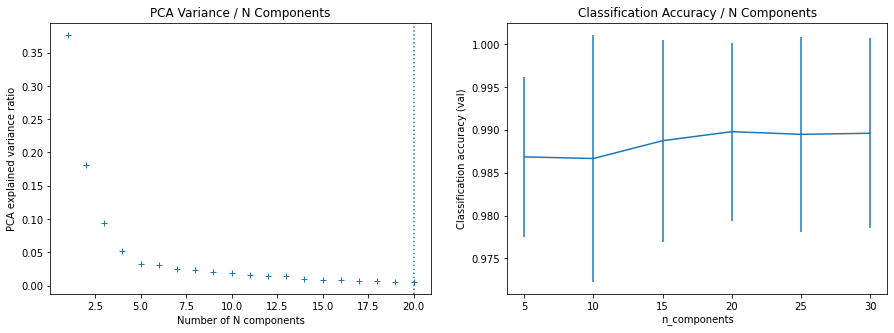

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2)
ax[0].axvline(
    SGD_CV_BE.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax[0].set_title('PCA Variance / N Components')
ax[0].set(xlabel="Number of N components", ylabel="PCA explained variance ratio")
# For each number of components, find the best classifier results
results = pd.DataFrame(SGD_CV_results)
components_col = "param_pca__n_components"

best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax[1]
)
ax[1].set_title("Classification Accuracy / N Components")
ax[1].set(ylabel="Classification accuracy (val)", xlabel="n_components")


fig.show()

As seen in the graphs above at 20 components, we have the best classification accuracy and the most ideal variance ratio

Let's train the SGD Model and evaluate it

In [ ]:
# Reset train test data & Preprocess
X_train = preprocessor.fit_transform(df_train.iloc[:, 1:-1].copy())
y_train = df_train['machine_status']
X_test = preprocessor.fit_transform(df_test.iloc[:, 1:-1].copy())
y_test = df_test['machine_status']


# Transform data using the fitted PCA model
principalComponents = pca.transform(X_train)

# Fit the derived principal components to the Stochastic Gradient Descent
SGD.fit(principalComponents, y_train)

SGDClassifier(loss='squared_hinge')

In [ ]:
# Let's retrieve our specific PCA columns from our original dataset
"""
This snippet to produce this readout was taken from dizzycoding.com
"""
n_comps = pca.n_components_
most_important_comps = [np.abs(pca.components_[i]).argmax() for i in range(n_comps)]
inital_features = list(df_train.columns)[1:-1]

most_important_sensors = [inital_features[most_important_comps[i]] for i in range(n_comps)]
dic = {i: most_important_sensors[i] for i in range(n_comps)}
df1 = pd.DataFrame(sorted(dic.items()))
print("Most Important Features")

df1.columns = ['PC', 'Sensor']
df1.sort_values(by=['PC'], ascending=True, kind='stable')
df1 = df1.iloc[:5].copy()
df1


Most Important Features


,PC,Sensor
0,0,sensor_23
1,1,sensor_04
2,2,sensor_42
3,3,sensor_37
4,4,sensor_47


In [ ]:
import seaborn as sn


In [ ]:
%%script echo skipping
cols = {0: 'sensor_23', 1: 'sensor_04', 2: 'sensor_42', 3: 'sensor_37', 4: 'sensor_47'}

p_df = pd.DataFrame(principalComponents).iloc[:, :5]
p_df.rename(columns=cols, inplace=True)
p_df['Machine_Status'] = y_train
sn.pairplot(p_df, hue='Machine_Status')

skipping


In [ ]:
test_components = pca.transform(X_test)
y_pred = SGD.predict(test_components)

Text(0.5, 1.0, 'Stochastic Gradient Descent Confusion Matrix')

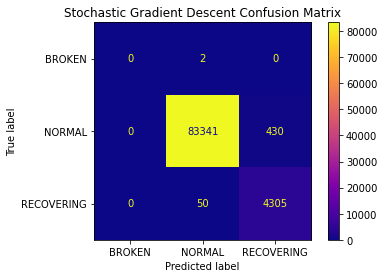

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
def get_MSE_PRES_RECALL_COV(y_pred,y_test, model):
    d = {}
    le = LabelEncoder()
    y_test_MSE = le.fit_transform(y_test)
    y_pred_MSE = le.fit_transform(y_pred)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test_MSE, y_pred_MSE,
                                                                     zero_division=1,
                                                                     average = 'micro')
    d['precision'] = precision
    d['recall'] = recall
    d['MSE'] = mean_squared_error(y_test_MSE, y_pred_MSE)
    d['Model'] = model
   
    return d



SGD_CMD = ConfusionMatrixDisplay.from_estimator(SGD, test_components, y_test, cmap='plasma')
SGD_CMD.ax_.set_title('Stochastic Gradient Descent Confusion Matrix')




In [ ]:

SGD_Specs = get_MSE_PRES_RECALL_COV(y_pred, y_test, SGD)
print('Model:', SGD_Specs['Model'])
print('Mean Squared Error:', SGD_Specs['MSE'])
print('Test Precision:', round(SGD_Specs['precision'],4))
print('Test Recall:   ', round(SGD_Specs['recall'], 4))


Model: SGDClassifier(loss='squared_hinge')
Mean Squared Error: 0.9968001089324618
Test Precision: 0.0049
Test Recall:    0.0049


## Modeling with KNN
Reset all data and create train/test sets again

In [ ]:
# Create X and y dataframes
X, y = df.iloc[:, 1:-1], df.iloc[:, -1]
X_features = list(X.columns)
# Create Train test split at 40%
last_40percent = round(len(df) - len(df) * .4)
df_train = df.iloc[:last_40percent, :]
df_test = df.iloc[last_40percent:, :]
# Create X_train, X_test, y_train, y_test
X_train = df_train.iloc[:, 1:-1].copy()
y_train = df_train['machine_status']
X_test = df_test.iloc[:, 1:-1].copy()
y_test = df_test['machine_status']

In [ ]:
# Using gridsearchCV let's determine the appropriate hyperparameters to provide to the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
pca = PCA(svd_solver='full', random_state=42)
knc_pipeline = Pipeline(steps=[("preprocesser", preprocessor), ('pca', pca), ("classifier", knc)])
knc_pipeline


Pipeline(steps=[('preprocesser',
                 ColumnTransformer(transformers=[('num_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sensor_01', 'sensor_02',
                                                   'sensor_03', 'sensor_04',
                                                   'sensor_05', 'sensor_06',
                                                   'sensor_07', 'sensor_08',
                                                   'sensor_09', 'sensor_10',
                                                   'sensor_11', 'sensor_12',
                                                   'sensor_13', 'sensor_14',
                                                   'sensor_16', 'sensor_17',
                                                   'sensor_18', 'sensor_19',
                                                   'sensor_20', 'sensor_21',
                                                   'sensor_22', 'sensor_23',
                                                   'sensor_24', 'sensor_25',
                                                   'sensor_26', 'sensor_27',
                                                   'sensor_28', 'sensor_29',
                                                   'sensor_30', 'sensor_31', ...])])),
                ('pca', PCA(random_state=42, svd_solver='full')),
                ('classifier', KNeighborsClassifier())])

In [ ]:
%%script echo skipping
from sklearn.model_selection import GridSearchCV

param_grid = {
    "pca__n_components": [15, 20, 25],
    "classifier__n_neighbors": [3,4,5],
    "classifier__weights": ['uniform', 'distance'],
    "classifier__algorithm": ['auto', 'ball_tree', 'kd_tree'],
    "classifier__leaf_size": [30]
}

knc_search = GridSearchCV(knc_pipeline, param_grid, n_jobs=4)


knc_search.fit(X_train, y_train)

skipping


In [ ]:
%%script echo skipping
joblib.dump(knc_search.best_estimator_, '/content/drive/MyDrive/PatternRec_Project/pkl_files/KNN_CV_BE.pkl')
joblib.dump(knc_search.best_params_, '/content/drive/MyDrive/PatternRec_Project/pkl_files/KNN_CV_Params.pkl')
joblib.dump(knc_search.best_score_, '/content/drive/MyDrive/PatternRec_Project/pkl_files/KNN_CV_Score.pkl')

skipping


In [ ]:
# knn_be = joblib.load('/content/drive/MyDrive/PatternRec_Project/pkl_files/KNN_CV_BE.pkl')
knn_params = joblib.load('/content/drive/MyDrive/PatternRec_Project/pkl_files/KNN_CV_Params.pkl')
knn_score = joblib.load('/content/drive/MyDrive/PatternRec_Project/pkl_files/KNN_CV_Score.pkl')
print('Best Params',knn_params)
print('Best Score', knn_score )

Best Params {'classifier__algorithm': 'kd_tree', 'classifier__leaf_size': 30, 'classifier__n_neighbors': 4, 'classifier__weights': 'distance', 'pca__n_components': 20}
Best Score 0.9819354439297117


In [ ]:
pca = PCA(n_components=20, svd_solver='full', random_state=42)
knc = KNeighborsClassifier(n_neighbors=knn_params['classifier__n_neighbors'], algorithm=knn_params['classifier__algorithm'],leaf_size=knn_params['classifier__leaf_size'], weights=knn_params['classifier__weights'] )

In [ ]:
knc_pipeline = Pipeline(steps=[("preprocesser", preprocessor), ('pca', pca), ("classifier", knc)])
mod = knc_pipeline.fit(X_train, y_train)
mod

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(transformers=[('num_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sensor_01', 'sensor_02',
                                                   'sensor_03', 'sensor_04',
                                                   'sensor_05', 'sensor_06',
                                                   'sensor_07', 'sensor_08',
                                                   'sensor_09', 'sensor_10',
                                                   'sensor_11', 'sensor_12',
                                                   'sensor_13', 'sensor_14',
                                                   'sensor_16', 'sensor_17',
                                                   'sensor_18', 'sensor_19',
                                                   'sensor_20', 'sensor_21',
                                                   'sensor_22', 'sensor_23',
                                                   'sensor_24', 'sensor_25',
                                                   'sensor_26', 'sensor_27',
                                                   'sensor_28', 'sensor_29',
                                                   'sensor_30', 'sensor_31', ...])])),
                ('pca',
                 PCA(n_components=20, random_state=42, svd_solver='full')),
                ('classifier',
                 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=4,
                                      weights='distance'))])

In [ ]:
y_pred = mod.predict(X_test)

In [ ]:
KNC_Specs = get_MSE_PRES_RECALL_COV(y_pred, y_test,knc)
print('Model:', KNC_Specs['Model'])
print('Mean Squared Error:', KNC_Specs['MSE'])
print('Test Precision:', round(KNC_Specs['precision'],4))
print('Test Recall:   ', round(KNC_Specs['recall'], 4))

Model: KNeighborsClassifier(algorithm='kd_tree', n_neighbors=4, weights='distance')
Mean Squared Error: 0.9983546659404503
Test Precision: 0.0044
Test Recall:    0.0044


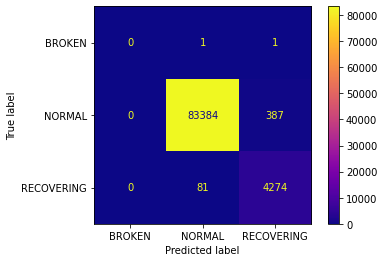

In [ ]:

KNN_CMD = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='plasma')

## Model Comparison

In [ ]:
from sklearn.cluster import KMeans
le = LabelEncoder()

# Create X and y dataframes
X, y = df.iloc[:, 1:-1], df.iloc[:, -1]
X_features = list(X.columns)
# Create Train test split at 40%
last_40percent = round(len(df) - len(df) * .4)
df_train = df.iloc[:last_40percent, :]
df_test = df.iloc[last_40percent:, :]
# Create X_train, X_test, y_train, y_test
X_train = df_train.iloc[:, 1:-1].copy()
y_train = df_train['machine_status']
X_test = df_test.iloc[:, 1:-1].copy()
y_test = df_test['machine_status']


KNN_untuned_pipe = Pipeline(steps=[("preprocesser", preprocessor), ('pca',PCA(random_state=42, svd_solver='full')), ("classifier", KNeighborsClassifier())])
KNN_tuned_model_pipe = mod


SGD_pca = PCA(n_components=20, svd_solver='full', random_state=42)
SGD = SGDClassifier(alpha=0.0001, loss='squared_hinge', penalty='l2', max_iter=1000, learning_rate='optimal')
SGD_untuned_model_pipe = Pipeline(steps=[('preprocesser',preprocessor), ('pca', PCA(random_state=42, svd_solver='full')), ('classifier', SGDClassifier())])
SGD_tuned_model_pipe = Pipeline(steps=[("preprocesser", preprocessor), ('pca', SGD_pca), ("classifier", SGD)])



KMeans_untuned_model_pipe = Pipeline(steps=[('preprocesser', preprocessor), ('pca', PCA(random_state=42, svd_solver="full")), ('classifier', KMeans(n_clusters = 3, random_state=42))])
KMeans_tuned_model_pipe = Pipeline(steps=[('preprocesser', preprocessor), ('pca', PCA(n_components=20, random_state=42, svd_solver='full')), ('classifier', KMeans(n_clusters = 3, algorithm='auto',init='k-means++', max_iter=500,random_state=42))])

estimator_pipeline = [SGD_untuned_model_pipe, SGD_tuned_model_pipe, KNN_untuned_pipe, KNN_tuned_model_pipe, KMeans_untuned_model_pipe, KMeans_tuned_model_pipe]


In [ ]:
model_list = ['Untuned Stochastic Gradient Descent Classifier', 'Tuned Stochastic Gradient Descent Classifier', 'Untuned K-Nearest Neighbors Classifier', 'Tuned K-Nearest Neighbors Classifier', 'Untuned KMeans Classifier', 'Tuned KMeans Classifier']
acc_list = []
auc_list = []
cm_list = []
roc_auc_scores = []

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

df['machine_status'] = le.fit_transform(df['machine_status'])
# Create X and y dataframes
X, y = df.iloc[:, 1:-1], df.iloc[:, -1]
X_features = list(X.columns)
# Create Train test split at 40%
last_40percent = round(len(df) - len(df) * .4)
df_train = df.iloc[:last_40percent, :]
df_test = df.iloc[last_40percent:, :]
# Create X_train, X_test, y_train, y_test
X_train = df_train.iloc[:, 1:-1].copy()
y_train = df_train['machine_status']
X_test = df_test.iloc[:, 1:-1].copy()
y_test = df_test['machine_status']

n_classes = 3

CLFS = []
y_scores = []
for est in estimator_pipeline:

  est.fit(X_train, y_train)
  CLFS.append(est)
  y_pred = est.predict(X_test)
  acc_list.append(metrics.accuracy_score(y_test,y_pred))
  cmd = confusion_matrix(y_test, y_pred)
  # cmd.ax_.set_title(f'{est["classifier"]} Confusion Matrix')
  cm_list.append(cmd)



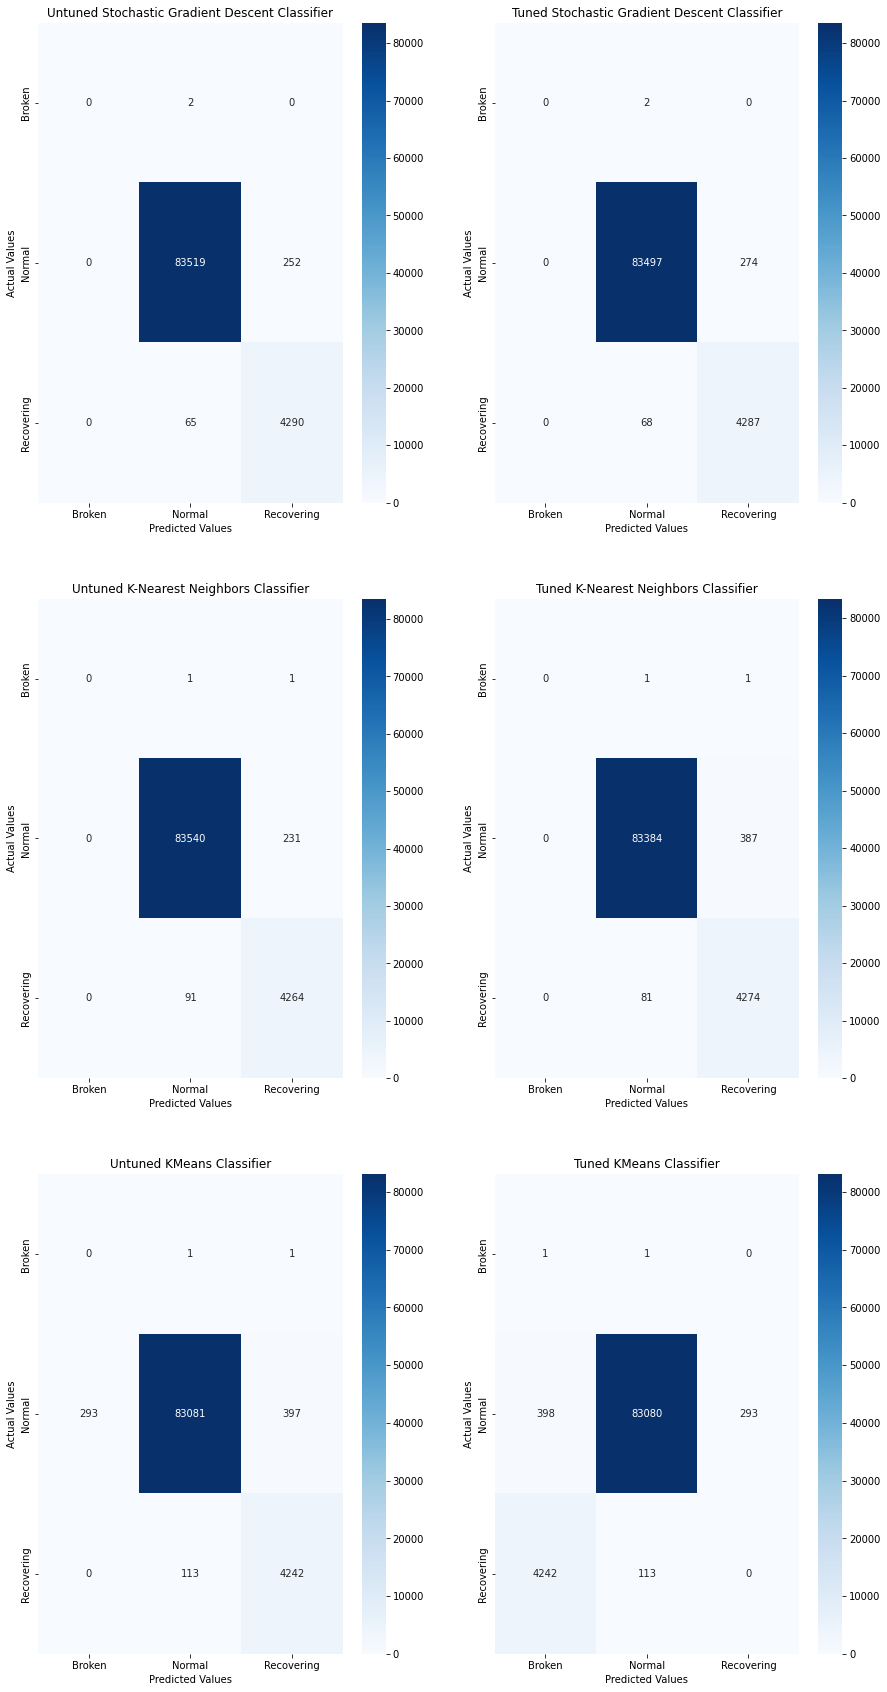

In [ ]:
fig = plt.figure(figsize=(15,30))


for i in range(len(cm_list)):
  cm = cm_list[i]
  model = model_list[i]
  sub = fig.add_subplot(3,2, i+1).set_title(model)
  
  cm_plot = sn.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Broken','Normal','Recovering'], yticklabels=['Broken','Normal','Recovering'])
  
  cm_plot.set_xlabel('Predicted Values')
  cm_plot.set_ylabel('Actual Values')



In [ ]:
result_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list})
result_df

,Model,Accuracy
0,Untuned Stochastic Gradient Descent Classifier,0.996380
1,Tuned Stochastic Gradient Descent Classifier,0.996097
2,Untuned K-Nearest Neighbors Classifier,0.996324
3,Tuned K-Nearest Neighbors Classifier,0.994667
4,Untuned KMeans Classifier,0.990866
5,Tuned KMeans Classifier,0.942731
